In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn import metrics
import seaborn as sns
from statistics import mean, stdev
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

data = np.empty(shape=[0, 222])

all_data = glob.glob('./drive/MyDrive/compsci/all_data.csv')

for j in all_data:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    data = np.append(data, csvrows, axis=0)

print(data.shape)

Loading  ./drive/MyDrive/compsci/all_data.csv
(151452, 222)


In [3]:
X = data[:,:-2]
y = data[:,-2]

In [4]:
gbc_clf = GradientBoostingClassifier(n_estimators=100,random_state=48)
ada_clf = AdaBoostClassifier(n_estimators=100,random_state=48)
rfc_clf = RandomForestClassifier(max_depth=10, random_state=48,n_estimators=10)
NB_clf = GaussianNB()
NNMLP_clf = MLPClassifier(random_state=48, max_iter=100)
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

kfold = StratifiedKFold(n_splits = 6,shuffle= True ,random_state =48)

In [5]:
def perform_metrics(clf_name, acc_list,pre_list,rec_list,f1_list,conf_list):
  accuracy = (round(np.mean(acc_list),3),round(stdev(acc_list),3))
  precision = (round(np.mean(pre_list),3),round(stdev(pre_list),3))
  recall = (round(np.mean(rec_list),3),round(stdev(rec_list),3))
  f1score = (round(np.mean(f1_list),3),round(stdev(f1_list),3))
  print('Classifier Name: ',clf_name)
  print('accuracy: ',accuracy)
  print('precision: ',precision)
  print('recall: ',recall)
  print('f1score: ',f1score)

  conf_list = np.nan_to_num(conf_list)
  conf = np.mean(conf_list,axis=0)
  plt.figure(figsize=(8,6))
  sns.heatmap(conf,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
  plt.title(clf_name + ' confusion matrix')
  return (clf_name,accuracy,precision,recall,f1score)

In [6]:
inputs=X
targets=y

categories = ['N','L','R','V','A','F','f','/']

In [7]:
ada_acc_list = []
ada_pre_list = []
ada_rec_list = []
ada_f1_list = []
ada_conf_list = []

rfc_acc_list = []
rfc_pre_list = []
rfc_rec_list = []
rfc_f1_list = []
rfc_conf_list = []

NB_acc_list = []
NB_pre_list = []
NB_rec_list = []
NB_f1_list = []
NB_conf_list = []

NNMLP_acc_list = []
NNMLP_pre_list = []
NNMLP_rec_list = []
NNMLP_f1_list = []
NNMLP_conf_list = []

svc_acc_list = []
svc_pre_list = []
svc_rec_list = []
svc_f1_list = []
svc_conf_list = []

from sklearn.utils import resample

fold_no = 1
for train, test in kfold.split(inputs, targets):

  N = train[(targets[train])==1.0]
  L = train[(targets[train])==2.0]
  R = train[(targets[train])==3.0]
  V = train[(targets[train])==4.0]
  A = train[(targets[train])==5.0]
  F = train[(targets[train])==6.0]
  f = train[(targets[train])==7.0]
  I = train[(targets[train])==8.0]

  seed=42
  np.random.seed(seed)
  def downsample(arr, n, seed):
      downsampled = resample(arr,replace=False,n_samples=n, random_state=seed)
      return downsampled

  def upsample(arr, n, seed):
      upsampled = resample(arr,replace=True,n_samples=n,random_state=seed)
      return upsampled

  all_class = [N,L,R,V,A,F,f,I]
  abn_class = [L,R,V,A,F,f,I]

  mean_val = np.mean([len(i) for i in abn_class], dtype= int)
  train_sampled = []

  for i in all_class:
      if i.shape[0]> mean_val:
          i = downsample(i,mean_val,seed)
      elif i.shape[0]< mean_val:
          i = upsample(i, mean_val,seed)
      train_sampled.append(i)
      
  train_sampled = np.concatenate(train_sampled)
  np.random.shuffle(train_sampled)
  train1 = train_sampled

  print('ada, Fold Number: ', fold_no)
  ada_clf.fit(inputs[train1], targets[train1])
  y_pred_ada = ada_clf.predict(inputs[test])
  ada_acc_list.append(accuracy_score(targets[test], y_pred_ada))
  ada_pre_list.append(precision_score(targets[test], y_pred_ada, average='macro'))
  ada_rec_list.append(recall_score(targets[test], y_pred_ada, average='macro'))
  ada_f1_list.append(f1_score(targets[test], y_pred_ada, average='macro'))
  ada_cm = confusion_matrix(targets[test], y_pred_ada)
  ada_cm = ada_cm.astype('float')/ ada_cm.sum(axis=1)[:,np.newaxis]
  ada_conf_list.append(ada_cm)
  
  print('rfc, Fold Number: ', fold_no)
  rfc_clf.fit(inputs[train1], targets[train1])
  y_pred_rfc = rfc_clf.predict(inputs[test])
  rfc_acc_list.append(accuracy_score(targets[test], y_pred_rfc))
  rfc_pre_list.append(precision_score(targets[test], y_pred_rfc, average='macro'))
  rfc_rec_list.append(recall_score(targets[test], y_pred_rfc, average='macro'))
  rfc_f1_list.append(f1_score(targets[test], y_pred_rfc, average='macro'))
  rfc_cm = confusion_matrix(targets[test], y_pred_rfc)
  rfc_cm = rfc_cm.astype('float')/ rfc_cm.sum(axis=1)[:,np.newaxis]
  rfc_conf_list.append(rfc_cm)

  print('NB, Fold Number: ', fold_no)
  NB_clf.fit(inputs[train1], targets[train1])
  y_pred_NB = NB_clf.predict(inputs[test])
  NB_acc_list.append(accuracy_score(targets[test], y_pred_NB))
  NB_pre_list.append(precision_score(targets[test], y_pred_NB, average='macro'))
  NB_rec_list.append(recall_score(targets[test], y_pred_NB, average='macro'))
  NB_f1_list.append(f1_score(targets[test], y_pred_NB, average='macro'))
  NB_cm = confusion_matrix(targets[test], y_pred_NB)
  NB_cm = NB_cm.astype('float')/ NB_cm.sum(axis=1)[:,np.newaxis]
  NB_conf_list.append(NB_cm)

  print('NNMLP, Fold Number: ', fold_no)
  NNMLP_clf.fit(inputs[train1], targets[train1])
  y_pred_NNMLP = NNMLP_clf.predict(inputs[test])
  NNMLP_acc_list.append(accuracy_score(targets[test], y_pred_NNMLP))
  NNMLP_pre_list.append(precision_score(targets[test], y_pred_NNMLP, average='macro'))
  NNMLP_rec_list.append(recall_score(targets[test], y_pred_NNMLP, average='macro'))
  NNMLP_f1_list.append(f1_score(targets[test], y_pred_NNMLP, average='macro'))
  NNMLP_cm = confusion_matrix(targets[test], y_pred_NNMLP)
  NNMLP_cm = NNMLP_cm.astype('float')/ NNMLP_cm.sum(axis=1)[:,np.newaxis]
  NNMLP_conf_list.append(NNMLP_cm)

  print('svc, Fold Number: ', fold_no)
  svc_clf.fit(inputs[train1], targets[train1])
  y_pred_svc = svc_clf.predict(inputs[test])
  svc_acc_list.append(accuracy_score(targets[test], y_pred_svc))
  svc_pre_list.append(precision_score(targets[test], y_pred_svc, average='macro'))
  svc_rec_list.append(recall_score(targets[test], y_pred_svc, average='macro'))
  svc_f1_list.append(f1_score(targets[test], y_pred_svc, average='macro'))
  svc_cm = confusion_matrix(targets[test], y_pred_svc)
  svc_cm = svc_cm.astype('float')/ svc_cm.sum(axis=1)[:,np.newaxis]
  svc_conf_list.append(svc_cm)

  fold_no = fold_no + 1

ada, Fold Number:  1
rfc, Fold Number:  1
NB, Fold Number:  1
NNMLP, Fold Number:  1
svc, Fold Number:  1
ada, Fold Number:  2
rfc, Fold Number:  2
NB, Fold Number:  2
NNMLP, Fold Number:  2
svc, Fold Number:  2
ada, Fold Number:  3
rfc, Fold Number:  3
NB, Fold Number:  3
NNMLP, Fold Number:  3
svc, Fold Number:  3
ada, Fold Number:  4
rfc, Fold Number:  4
NB, Fold Number:  4
NNMLP, Fold Number:  4
svc, Fold Number:  4
ada, Fold Number:  5
rfc, Fold Number:  5
NB, Fold Number:  5
NNMLP, Fold Number:  5
svc, Fold Number:  5
ada, Fold Number:  6
rfc, Fold Number:  6
NB, Fold Number:  6
NNMLP, Fold Number:  6
svc, Fold Number:  6


Classifier Name:  ADA
accuracy:  (0.498, 0.231)
precision:  (0.356, 0.022)
recall:  (0.422, 0.053)
f1score:  (0.309, 0.045)
Classifier Name:  RFC
accuracy:  (0.911, 0.005)
precision:  (0.69, 0.007)
recall:  (0.918, 0.002)
f1score:  (0.757, 0.008)
Classifier Name:  NB
accuracy:  (0.397, 0.005)
precision:  (0.368, 0.002)
recall:  (0.6, 0.005)
f1score:  (0.347, 0.002)
Classifier Name:  NNMLP
accuracy:  (0.944, 0.007)
precision:  (0.769, 0.014)
recall:  (0.949, 0.007)
f1score:  (0.828, 0.013)
Classifier Name:  SVC
accuracy:  (0.947, 0.004)
precision:  (0.775, 0.009)
recall:  (0.954, 0.005)
f1score:  (0.827, 0.008)


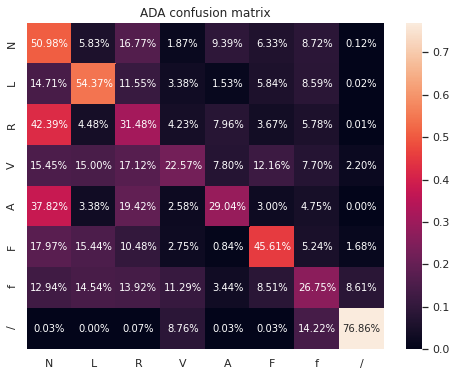

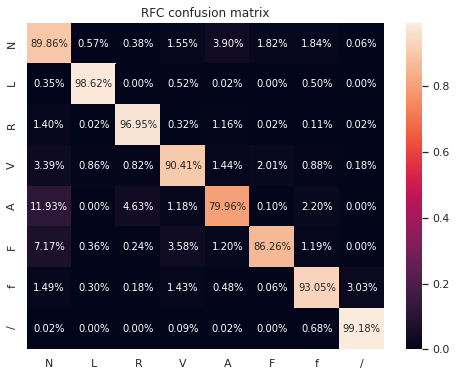

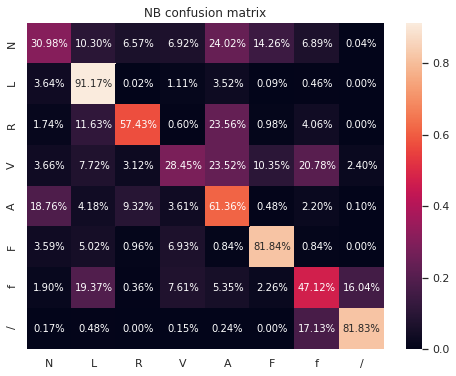

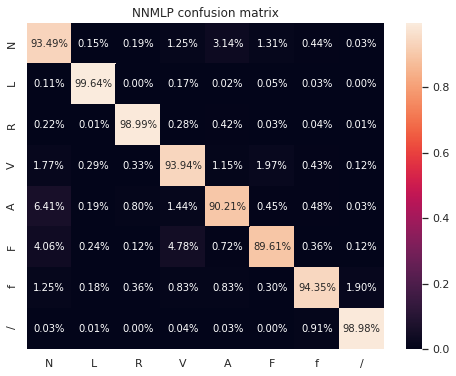

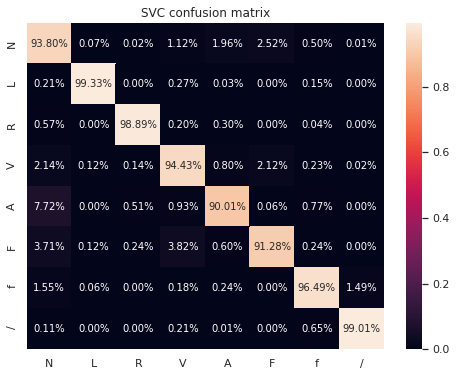

In [8]:
ADA_results = perform_metrics('ADA', ada_acc_list, ada_pre_list, ada_rec_list, ada_f1_list, ada_conf_list)
RFC_results = perform_metrics('RFC', rfc_acc_list, rfc_pre_list, rfc_rec_list, rfc_f1_list, rfc_conf_list)
NB_results =  perform_metrics('NB', NB_acc_list, NB_pre_list, NB_rec_list, NB_f1_list, NB_conf_list)
NNMLP_results = perform_metrics('NNMLP', NNMLP_acc_list, NNMLP_pre_list, NNMLP_rec_list, NNMLP_f1_list, NNMLP_conf_list)
SVC_results = perform_metrics('SVC', svc_acc_list, svc_pre_list, svc_rec_list, svc_f1_list, svc_conf_list)

In [9]:
sklearn_results = pd.DataFrame(data = (ADA_results,RFC_results,NB_results,NNMLP_results,SVC_results))

In [10]:
print(sklearn_results)
sklearn_results.to_csv('sklearn_cv_results.csv', encoding='utf-8', index=False)

       0               1               2               3               4
0    ADA  (0.498, 0.231)  (0.356, 0.022)  (0.422, 0.053)  (0.309, 0.045)
1    RFC  (0.911, 0.005)   (0.69, 0.007)  (0.918, 0.002)  (0.757, 0.008)
2     NB  (0.397, 0.005)  (0.368, 0.002)    (0.6, 0.005)  (0.347, 0.002)
3  NNMLP  (0.944, 0.007)  (0.769, 0.014)  (0.949, 0.007)  (0.828, 0.013)
4    SVC  (0.947, 0.004)  (0.775, 0.009)  (0.954, 0.005)  (0.827, 0.008)
